# Intoduction to Digital Image Processing - 361.1.4751
# Exercise 5- Feature Descriptors and Geometric Transformations

For any questions regarding this assignment please refer to the course forum on the moodle web site, for personal questions please email alonfi@post.bgu.ac.il



## Load the dataset from google drive

First, the notebook needs to gain access to your drive.

Run the next code:

In [1]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next:

1.   Make sure the images are in the **same** directory as the notebooke file (not in a sub-directory)

2.   Update the directory path to your google drive directory

3.   Run the code

If it worked properly, you should be able to see the 'mona_org.jpg' image.

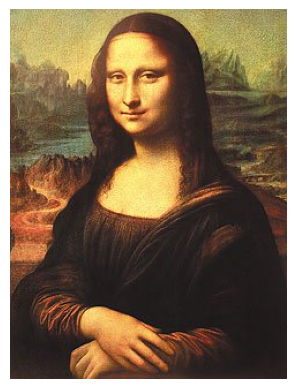

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

directory = '/content/gdrive/MyDrive/images/EX5'  # Enter the path to your google drive directory
os.chdir(directory)

# Load the image using OpenCV
colorMona = cv2.imread('mona_org.jpg')  # Load as color (default)

# Convert BGR to RGB for correct color rendering with matplotlib
colorMona = cv2.cvtColor(colorMona, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(colorMona)
plt.axis('off')  # Hide the axes
plt.show()



## 1. Mona Liza

### 1.1 Introduction to feature descriptors

1. For this assignment, choose a preferred descriptor extraction method (e.g., SURF or SIFT, etc.) and review the official documentation in Python, Briefly explain your choice.

For this exercise, we'll use the SIFT (Scale-Invariant Feature Transform) descriptor, as mentioned in the notebook instructions.

SIFT is a good choice because it is robust to changes in scale, rotation, and illumination. This makes it useful for image matching and object recognition tasks. It works by identifying keypoints in an image, and then creating a descriptor that captures the local appearance around those keypoints.

2. Read the images 'mona_org.jpg' and convert it to gray scale and **don't** normalize the image (it affects on the descriptor function later). Use the `cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)` function. Show the image.

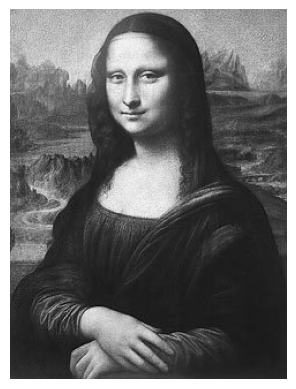

In [3]:
# Load the image in grayscale
grayMona = cv2.imread('mona_org.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(grayMona, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

3. Extract all the features from the image and **time** the feature extraction process. How many features did you find ? present them alongside the image.  

Note:
Due to licensing issues, use the `SIFT` descriptor from the `cv2` library.

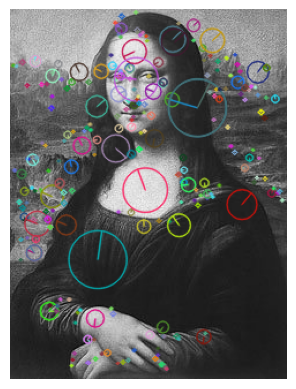

Number of features found: 271
Time taken for feature extraction: 0.04144716262817383 seconds


In [5]:
import time
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Time the feature extraction
start_time = time.time()
keypoints, descriptors = sift.detectAndCompute(grayMona, None)
end_time = time.time()

# Draw keypoints on the image
mona_with_keypoints = cv2.drawKeypoints(grayMona, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

mona_with_keypoints = cv2.cvtColor(mona_with_keypoints, cv2.IMREAD_GRAYSCALE)

# Display the image with keypoints
plt.imshow(mona_with_keypoints)
plt.axis('off')  # Hide the axes
plt.show()

# Print the number of features and the time it took
print("Number of features found:", len(keypoints))
print("Time taken for feature extraction:", end_time - start_time, "seconds")
time_it_took_13 = end_time - start_time

As we can see We found 271 fetures and it took 0.12 secounds

we performed a process of detecting features from thr image using the SIFT algo. First we start with measuring the time and identified the keypoints in the image and calculated their corresponding descritors using detectAndCompute. The, we drew the keypoints on the image using drawKwypoins.

4. Extract features from the image with the Region of Interest (ROI) defined by coordinates $(x_{\text{start}}, y_{\text{start}})$ = (59, 5), width = 128 pixels and height = 120 pixels. Present the ROI and the features alongside the image. Compare the runtime of this approach with **section 1.1.3**. How many features did you find? Did you notice any trade-offs?


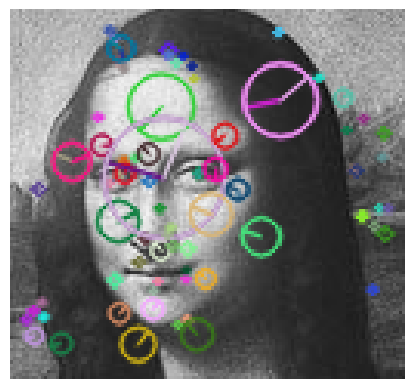

Number of features found in ROI: 84
Time taken for feature extraction in ROI: 0.011631011962890625 seconds
Time taken for feature extraction in the full image: 0.011631011962890625 seconds
The time difference is: -0.029816150665283203 seconds


In [6]:
# Define ROI
x_start, y_start = 59, 5
width, height = 128, 120

# Extract ROI
roi = grayMona[y_start:y_start+height, x_start:x_start+width]

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Time the feature extraction on ROI
start_time = time.time()
keypoints_roi, descriptors_roi = sift.detectAndCompute(roi, None)
end_time = time.time()

# Draw keypoints on the ROI
roi_with_keypoints = cv2.drawKeypoints(roi, keypoints_roi, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

roi_with_keypoints = cv2.cvtColor(roi_with_keypoints, cv2.IMREAD_GRAYSCALE)

# Display the ROI with keypoints
plt.imshow(roi_with_keypoints)
plt.axis('off')  # Hide the axes
plt.show()


# Print the number of features and the time it took
print("Number of features found in ROI:", len(keypoints_roi))
print("Time taken for feature extraction in ROI:", end_time - start_time, "seconds")


#Compare the runtime of this approach with section 1.1.3
time_roi_image = end_time - start_time
print("Time taken for feature extraction in the full image:", time_roi_image, "seconds")

# Compare the runtimes
print("The time difference is:", time_roi_image - (time_it_took_13), "seconds")


We can see that we get less featurs if we look at a specific roi(84 as appose to 271), how ever the time it takes is less.
the trade off is between the number of feturs and the time
if we know already we need to look to a specific place, there is no reason to check all the picture

### 1.2. Make Mona Straight Again

1. Read the images ’straight_mona.PNG’ and ’crooked_mona.jpg’ and convert them to greyscale (don't normalize). Plot the results.

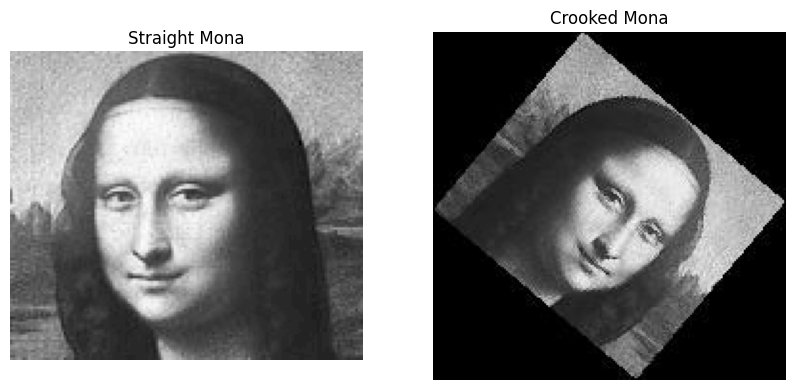

In [7]:
# Load the straight Mona image in grayscale
straight_mona = cv2.imread('straight_mona.PNG', cv2.IMREAD_GRAYSCALE)

# Load the crooked Mona image in grayscale
crooked_mona = cv2.imread('crooked_mona.jpg', cv2.IMREAD_GRAYSCALE)

# Create a figure and subplots for displaying the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the straight Mona image
axes[0].imshow(straight_mona, cmap='gray')
axes[0].set_title('Straight Mona')
axes[0].axis('off')  # Hide axes

# Display the crooked Mona image
axes[1].imshow(crooked_mona, cmap='gray')
axes[1].set_title('Crooked Mona')
axes[1].axis('off')  # Hide axes

# Show the plot
plt.show()

We can see here the 2 pics where one is corrked

2. Extract the feature points of each image and display the ten strongest
features.

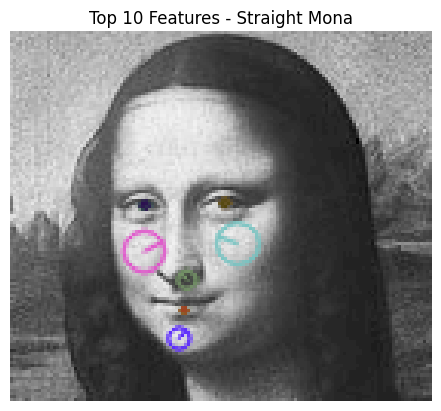

Number of features found in Straight Mona: 271


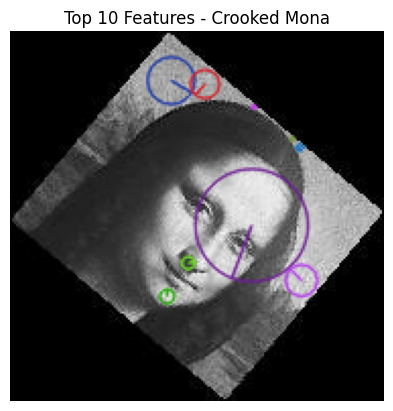

Number of features found in Crooked Mona: 271


In [8]:
# Initialize SIFT detector
sift = cv2.SIFT_create()


def get_to_features(image):
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Sort keypoints by response (strength)
    keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)

    # Select top 10 keypoints
    top_keypoints = keypoints[:10]
    return top_keypoints

# Function to extract and display top features
def display_top_features(image, title):
    top_keypoints = get_to_features(image)

    # Draw only the top 10 keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, top_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    image_with_keypoints = cv2.cvtColor(image_with_keypoints, cv2.IMREAD_GRAYSCALE)

    # Display the image with the top keypoints
    plt.imshow(image_with_keypoints)
    plt.title(f'Top 10 Features - {title}')
    plt.axis('off')
    plt.show()

    print(f"Number of features found in {title}:", len(keypoints))

# Display top features for straight Mona
display_top_features(straight_mona, 'Straight Mona')

# Display top features for crooked Mona
display_top_features(crooked_mona, 'Crooked Mona')

We can see here that there are soem commen fetures

3. Use the extracted feature points to straighten the ’crooked_mona.jpg’ image so that Mona’s face will be straight. Display the images. Explain your
algorithm using a block diagram and elaborate on each step.

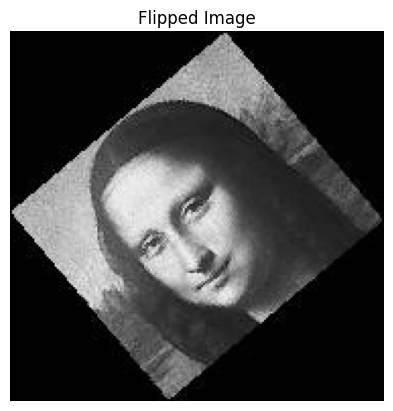

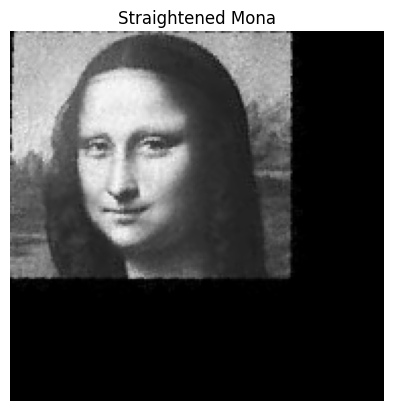

In [9]:
import numpy as np
# Load the crooked Mona image in grayscale
crooked_mona = cv2.imread('crooked_mona.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Flip the image horizontally to create a mirrored version
crooked_mona = cv2.flip(crooked_mona, 1)

# Display the flipped image
plt.imshow(crooked_mona, cmap='gray')
plt.title('Flipped Image')
plt.axis('off')
plt.show()

sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors for both images
# Detect keypoints and compute descriptors for the original Mona Lisa image (straight_mona)
keypoints_org, descriptors_org = sift.detectAndCompute(straight_mona, None)

# Detect keypoints and compute descriptors for the flipped (crooked) image
keypoints_crooked, descriptors_crooked = sift.detectAndCompute(crooked_mona, None)

# Step 3: Set parameters for the FLANN-based matcher
# Use KD-tree algorithm for fast nearest-neighbor search
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=4)  # Indexing parameters
search_params = dict(checks=60)  # Number of checks during search

# Create a FLANN-based matcher object
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Step 4: Match descriptors between the crooked and original images
matches = flann.knnMatch(descriptors_crooked, descriptors_org, k=2)

# Step 5: Apply the ratio crooked to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.64 * n.distance:  # Ratio crooked to filter out weak matches
        good_matches.append(m)

# # Draw only the good matches on a combined image
# matched_image = cv2.drawMatches(crooked_mona, keypoints_crooked, straight_mona, keypoints_org,
#                                 good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# # Display the matched image
# plt.figure(figsize=(12, 6))
# plt.title("Feature Matches")
# plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
# plt.axis('off')
# plt.show()

# Step 6: Extract matched keypoints from both images
# Get source points from the crooked image (crooked Mona)
src_pts = np.float32([keypoints_crooked[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Get destination points from the original image (straight Mona)
dst_pts = np.float32([keypoints_org[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 7: Find the homography matrix using RANSAC
# Homography matrix aligns the crooked image to the original
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Step 8: Warp the crooked image using the homography matrix
# Get the dimensions of the crooked Mona image
height, width = crooked_mona.shape

# Apply the homography transformation to straighten the image
straightened_mona = cv2.warpPerspective(crooked_mona, H, (width, height))

plt.imshow(straightened_mona, cmap='gray')  # Display in grayscale
plt.title('Straightened Mona')
plt.axis('off')
plt.show()

my algorithem is:
Preprocessing: Load the "crooked" Mona Lisa image, flip it horizontally, and prepare the reference "straight" image.

Feature Extraction: Use SIFT to detect keypoints (distinct features) and compute descriptors (unique signatures) for both images.

Feature Matching: Use FLANN-based matching to find corresponding keypoints between the crooked and straight images.
Apply Lowe's ratio test to filter out weak matches, retaining only the strongest.
Homography Estimation:

Use the matched keypoints to compute a homography matrix using RANSAC, which identifies the geometric transformation needed to align the crooked image with the straight one.
Image Transformation:

Apply the homography matrix to warp the crooked image, producing the straightened version.

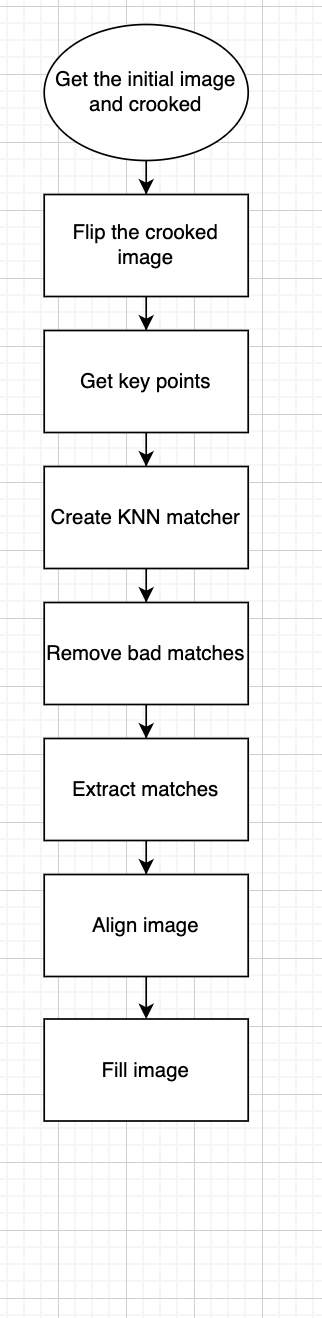

### 1.3 Fake or Real- OPTIONAL

1. Read the image *'mona_org.jpg'* and use the extracted features to automatically detect images in which the real Mona Lisa face exists.
    1. The 12 test images are in the zip file named *'Monas'*.
    2. The images path should be written as 'Monas/image'. For example: 'Monas/Mona1_Y.jpg'
    3. The last letter in the image name 'Y' or 'N' suggests if we consider that Mona's face is in the image or not.
    4. The code should print out the names of the images you detected Mona's face inside.
    5. The algorithm should be totally automatic and run on all the images in the same manner.
    6. Try taking under consideration the trade-off between finding a lot of correct images and falsely detecting wrong images.
    7. Try to do your (and your algorithm's) best. If you can't detect an image, just try your best and explain why it was impossible.


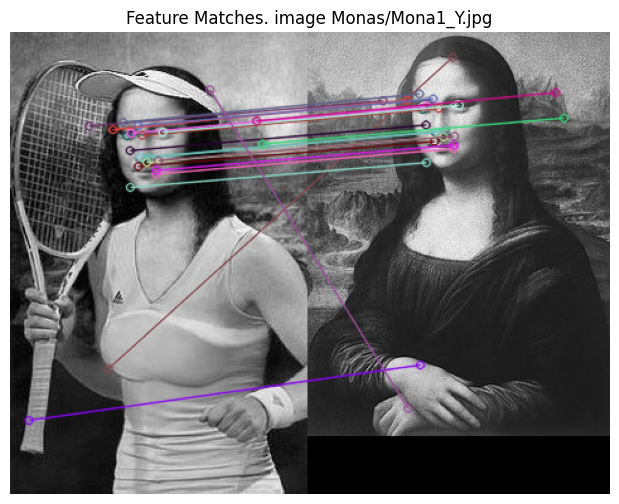

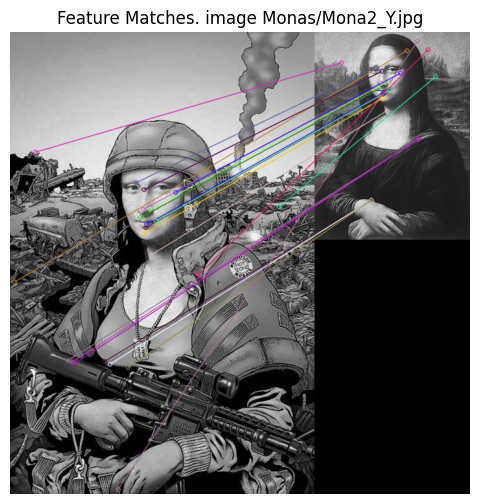

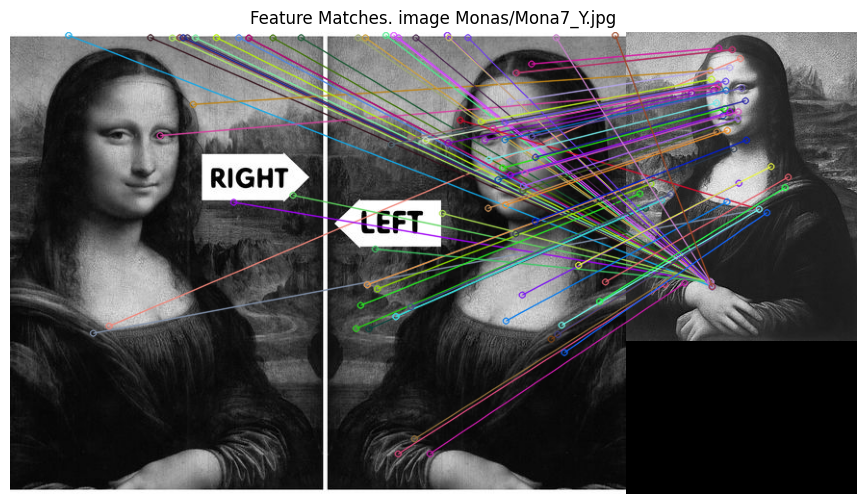

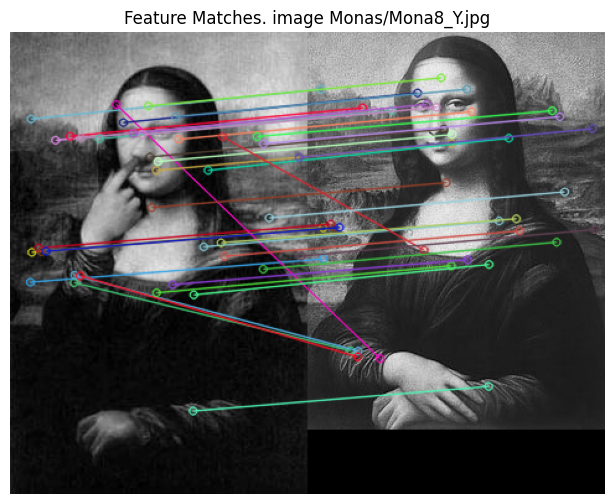

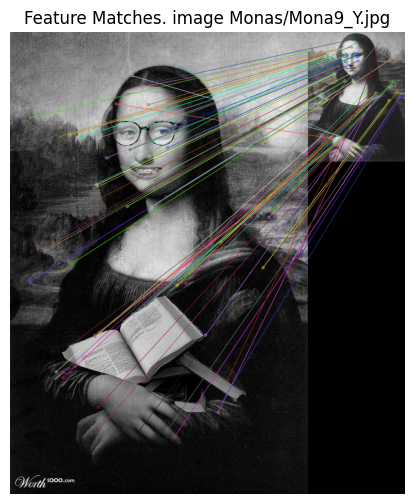

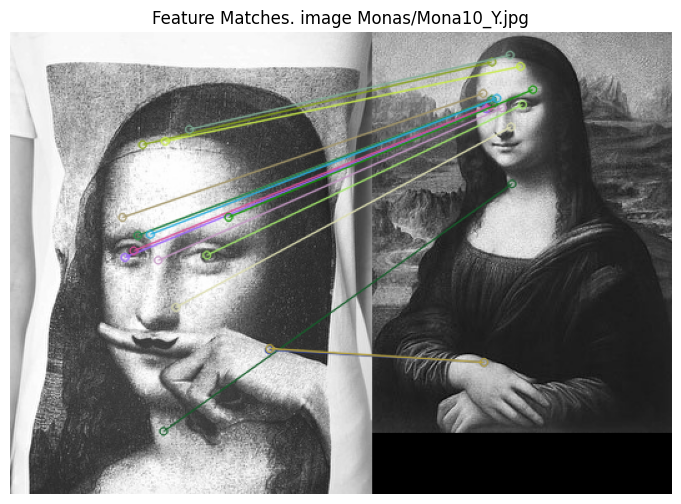

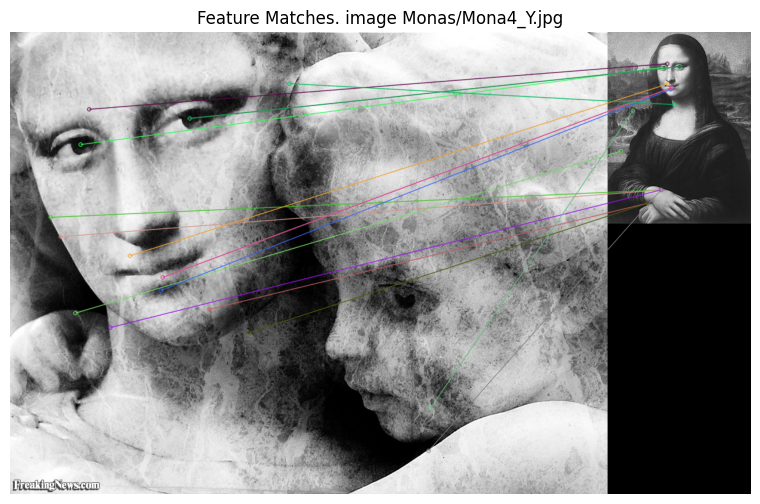

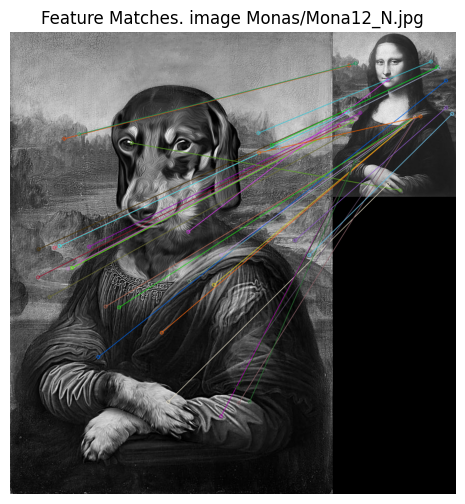

Detected images: ['Mona1_Y.jpg', 'Mona2_Y.jpg', 'Mona7_Y.jpg', 'Mona8_Y.jpg', 'Mona9_Y.jpg', 'Mona10_Y.jpg', 'Mona4_Y.jpg', 'Mona12_N.jpg']


In [12]:
# Load the original Mona Lisa image in grayscale
mona_org = cv2.imread('mona_org.jpg', cv2.IMREAD_GRAYSCALE)

# Create a SIFT object for feature extraction
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for the original Mona Lisa image
keypoints_org, descriptors_org = sift.detectAndCompute(mona_org, None)

# Function to visualize the matches between two images
def visualize_matches(test_image, keypoints_test, matches, good_matches, test_image_path):
    # Draw only the good matches on the image
    matched_image = cv2.drawMatches(test_image, keypoints_test, mona_org, keypoints_org,
                                    good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matched image using matplotlib
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Matches. image {test_image_path}")
    plt.imshow(cv2.cvtColor(matched_image, cv2.IMREAD_GRAYSCALE))
    plt.axis('off')  # Hide axes
    plt.show()

# Function to detect if the Mona Lisa is present in a test image
def detect_mona(test_image_path, threshold=15):
    # Load the test image in grayscale
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

    # Detect keypoints and compute descriptors for the test image
    keypoints_test, descriptors_test = sift.detectAndCompute(test_image, None)

    # Set parameters for FLANN-based matcher
    FLANN_INDEX_KDTREE = 1  # Use KD-tree for indexing
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=2)  # Index parameters
    search_params = dict(checks=50)  # Search parameters

    # Create a FLANN-based matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Find matches between the test and original descriptors
    matches = flann.knnMatch(descriptors_test, descriptors_org, k=2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Calculate the match score based on the number of good matches
    match_score = len(good_matches)

    # Return True if match score is above the threshold, otherwise False
    return match_score > threshold, good_matches

# Initialize an empty list to store detected images
detected_images = []

# Loop through the images in the "Monas" folder
for filename in os.listdir('Monas'):
    # Get the full path to the test image
    test_image_path = os.path.join('Monas', filename)

    # Detect if Mona Lisa is present in the test image
    detected, good_matches = detect_mona(test_image_path)

    # If Mona Lisa is detected, add the filename to the list and visualize matches
    if detected:
        detected_images.append(filename)

        # Load the test image again for visualization
        test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

        # Detect keypoints in the test image (descriptors are not needed here)
        keypoints_test, _ = sift.detectAndCompute(test_image, None)

        # Visualize the matches
        visualize_matches(test_image, keypoints_test, good_matches, good_matches, test_image_path)

# Print the detected images
print("Detected images:", detected_images)

as we can see we detected correctly 1,2,4,7,8,9 we missed 3 and detected 12 incorrectly
the reason we detected 12 is beacause it had the excat sam background. to not dected it we though about using a roi for the face, but to do that we needed to dected the face (becuase it wasn't always at the same place).

we meissed 3 because it looks a lot more diffrent and have diffrent fetures.

there are a lot of hyper params in this algorithem which we played to get the best option we could.
the algorithem is using sift to detect the test and the original fetures. then using FlannBasedMatcher algorithem to find matches, then using some threshold to determin if this is a good match, afterwords checking if we got at least 15 good matches, if so we say it is the same, if not it's not.

BTW, we tried to use this algorithm in the pic before and it didn't worked well, it didn't find enough goot matches

2. Display the images you found.

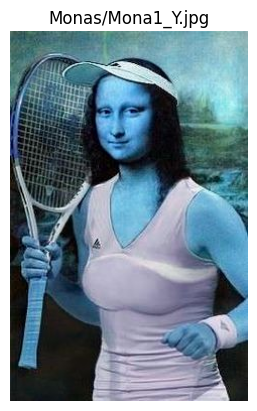

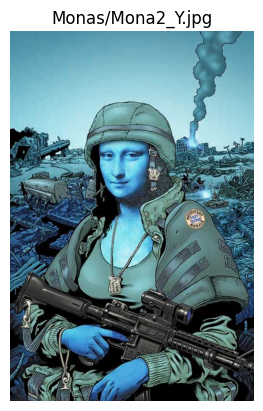

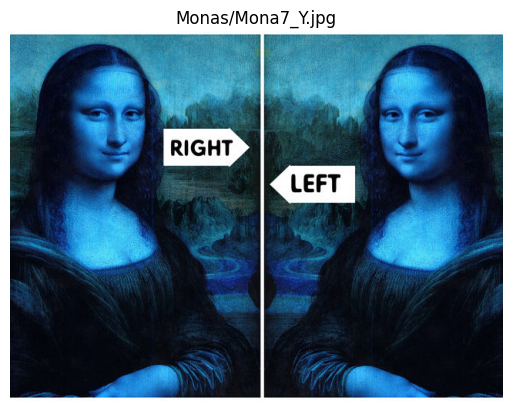

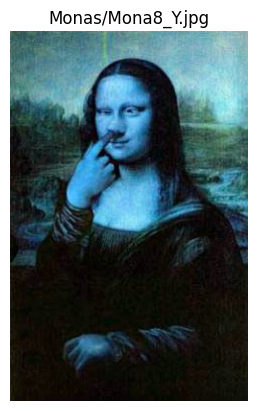

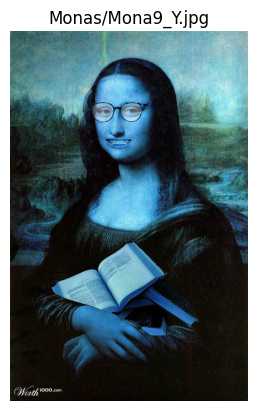

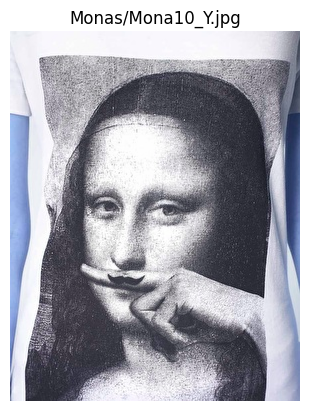

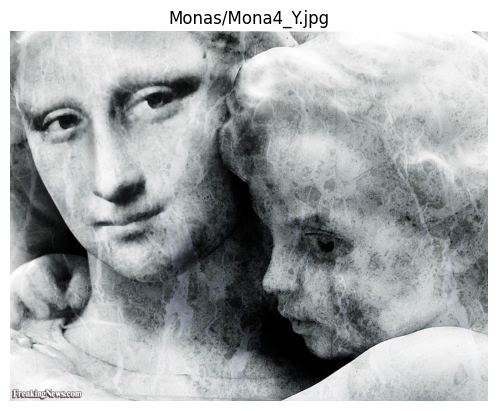

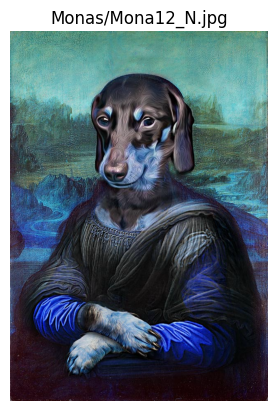

In [13]:
for image in detected_images:
    image_path = os.path.join('Monas', image)
    image = cv2.imread(image_path)
    plt.title(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

3. Explain your algorithm using a block diagram and elaborate on each
of the steps.

We get the original and the test

we take the fetures

check if there are matches and if they are good

and cheack how many matches, using a thereshold to decide if it countes for a correct mona or not

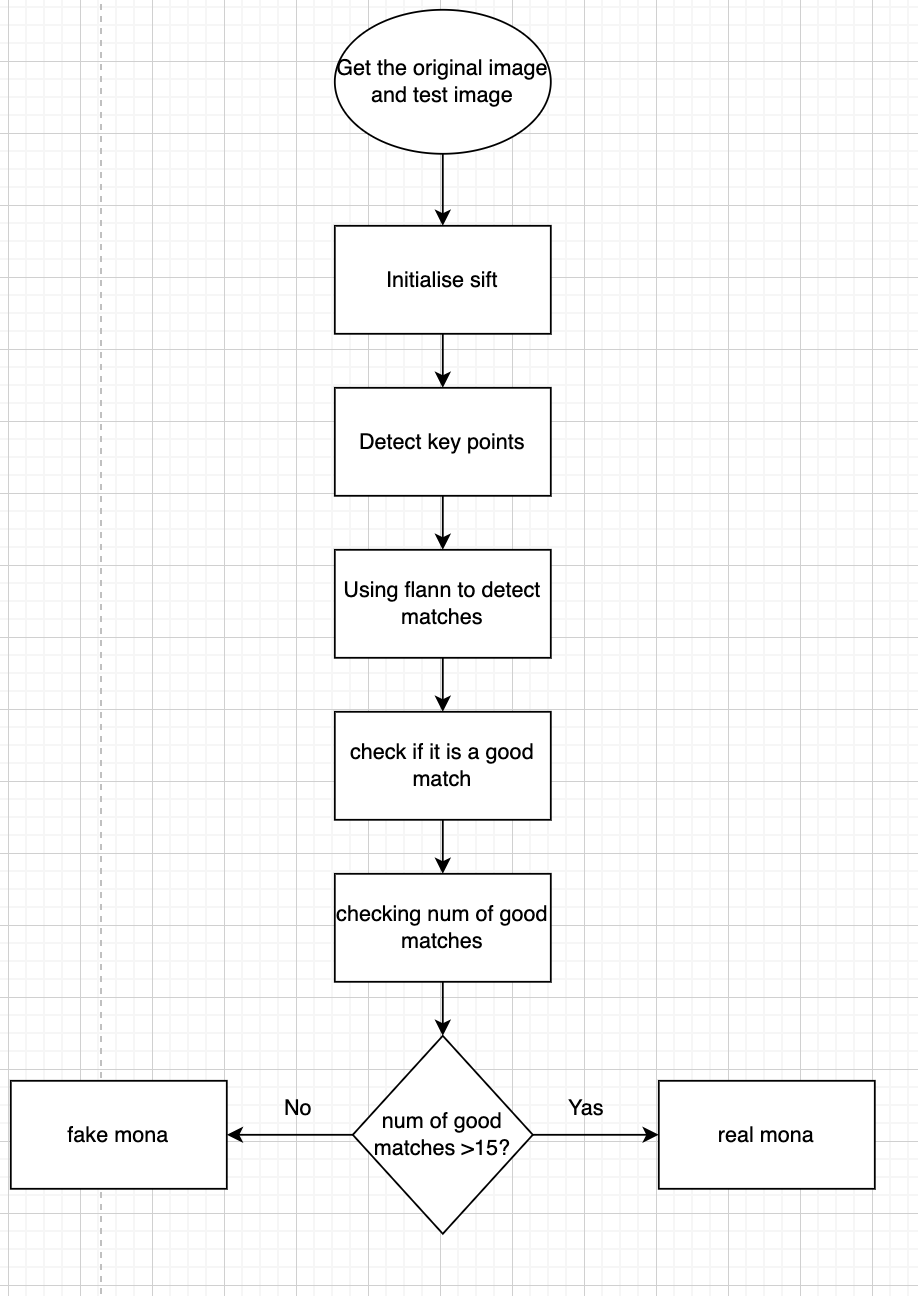

4. For each image show the matching features. See example:

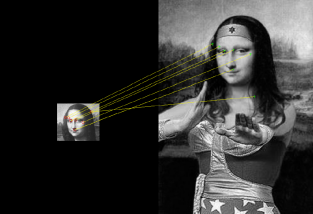

I added the visulstion above in 1

5. Analyze the results. Where did your algorithm perform well and where did it not?

I wrote the anlization in 1.3.1

## 2. QR Code Reader
In this assignment, we will learn to read a simplified version of the
QR Code.

1. Insert your 9 digit ID into the attached function `ID2QR(id)` where ID is a string and the QR code is a matrix of 6x6 binary
values. The matrix is column
major, meaning that the correct order is (1,1), (2,1), ..., (6,1), (1,2), (2,2),
....., (6,6).

Example: If the first digit of your ID is 3-> convert to binary: 0011.
Matrix(1,1) = 0 (black), Matrix(2,1) = 0 (black), Matrix(3,1) = 1 (white), Matrix(4,1) = 1 (white).

Print the ID and show the QR code.

ID: 207487653
QR Code Matrix:
 [[0 0 0 0 0 0]
 [0 0 1 0 1 1]
 [1 0 0 0 1 0]
 [0 1 0 1 0 0]
 [0 1 1 1 0 1]
 [0 1 0 1 1 1]]


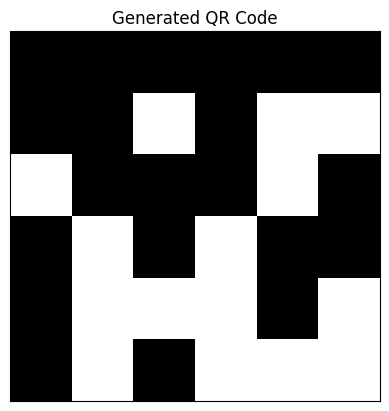

In [ ]:
def ID2QR(id):
  if len(id) != 9 or not id.isdigit():
    raise ValueError("ID must be a 9-digit string")

  qr_code = np.zeros((6, 6), dtype=int)
  binary_string = ""
  for digit in id:
      binary_digit = bin(int(digit))[2:].zfill(4)
      binary_string += binary_digit

  # Fill the matrix column-wise
  k = 0
  for j in range(6):
      for i in range(6):
        if k < len(binary_string):
           qr_code[i,j] = int(binary_string[k])
           k += 1

  return qr_code

my_id = "207487653"
try:
    qr_matrix = ID2QR(my_id)

    print("ID:", my_id)
    print("QR Code Matrix:\n", qr_matrix)

    # Display the QR code as an image
    plt.imshow(qr_matrix, cmap='gray', interpolation='none')
    plt.title("Generated QR Code")
    plt.xticks([])
    plt.yticks([])
    plt.show()

except ValueError as e:
    print("Error:", e)

here we converted Maya's id to a binery string.
the image is 6x6 so each int in the id needs to brepresented by 4 digits I used fill (6x6 = 36; 36/9 =4) and each time took the digit of the specific place in the matrix

2. Print the QR on paper. Take three photos of the QR code from three different angles: easy, intermediate,
hard.
The “hard” photo should be one that is on the limit where you can no
longer properly interpret the QR code. See example:

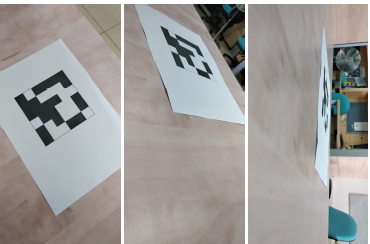

Save the images in the 'QRs' directory as `Easy_image.jpg`, `Inter_image.jpg`, `Hard_image.jpg`

3. Locate the points on the QR code in each image manually. You may
use `matplotlib.pyplot.ginput(4)`.
You can't use the function on google colab. Use the function in a local python IDE on your computer and save the points in the 'QRs' directory as:
`Easy_points.npy`, `Inter_points.npy`, `Hard_points.npy`. Show the images with the points highlighted on them.

Notes:


*   The order of the points sampled should be the same for each image.
*   No need to show the code you used to sample the points.





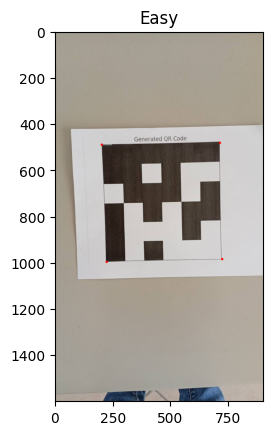

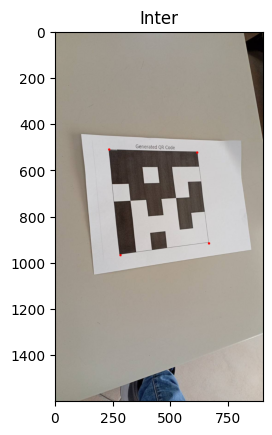

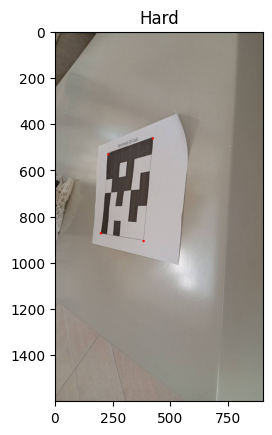

In [ ]:
def display_image_with_points(image_path, points_path, difficulty_level):
    image = cv2.imread(image_path)
    points = np.load(points_path)
    if image is None:
      print(f"Error: Could not load image at {image_path}")
      return


    # If points are not tuples or lists of integers
    if not all(isinstance(p, tuple) and all(isinstance(x, int) for x in p) for p in points):
        points = [tuple(map(int, p)) for p in points]  # Convert to tuples of integers

    for point in points:
        cv2.circle(image, point, 5, (0, 0, 255), -1)  # Red circle

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{difficulty_level}")
    plt.show()


display_image_with_points(directory + "/Easy_image.jpg", directory +"/QRs/Easy_points.npy", "Easy")
display_image_with_points(directory +"/Inter_image.jpg", directory +"/QRs/Inter_points.npy", "Inter")
display_image_with_points(directory +"/Hard_image.jpg", directory +"/QRs/Hard_points.npy", "Hard")

We can see here the 3 pics and 4 dots around this pics as expected

4. Transform the image such that the QR code is straightened. For each
image use all the transformations learned in class: Rigid (rotation, trans-
lation and scale transformation), Affine (shearing added), Perspective.

Processing Easy Image...


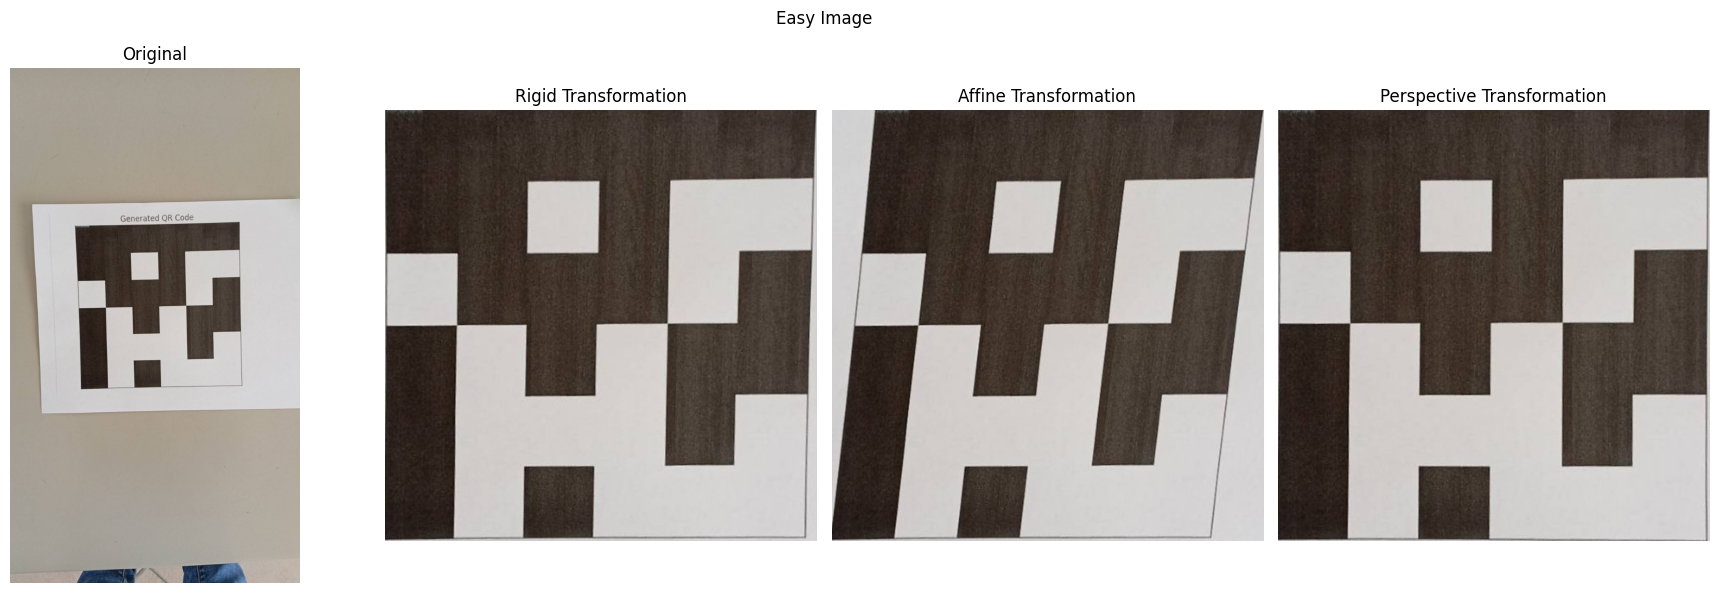

Processing Inter Image...


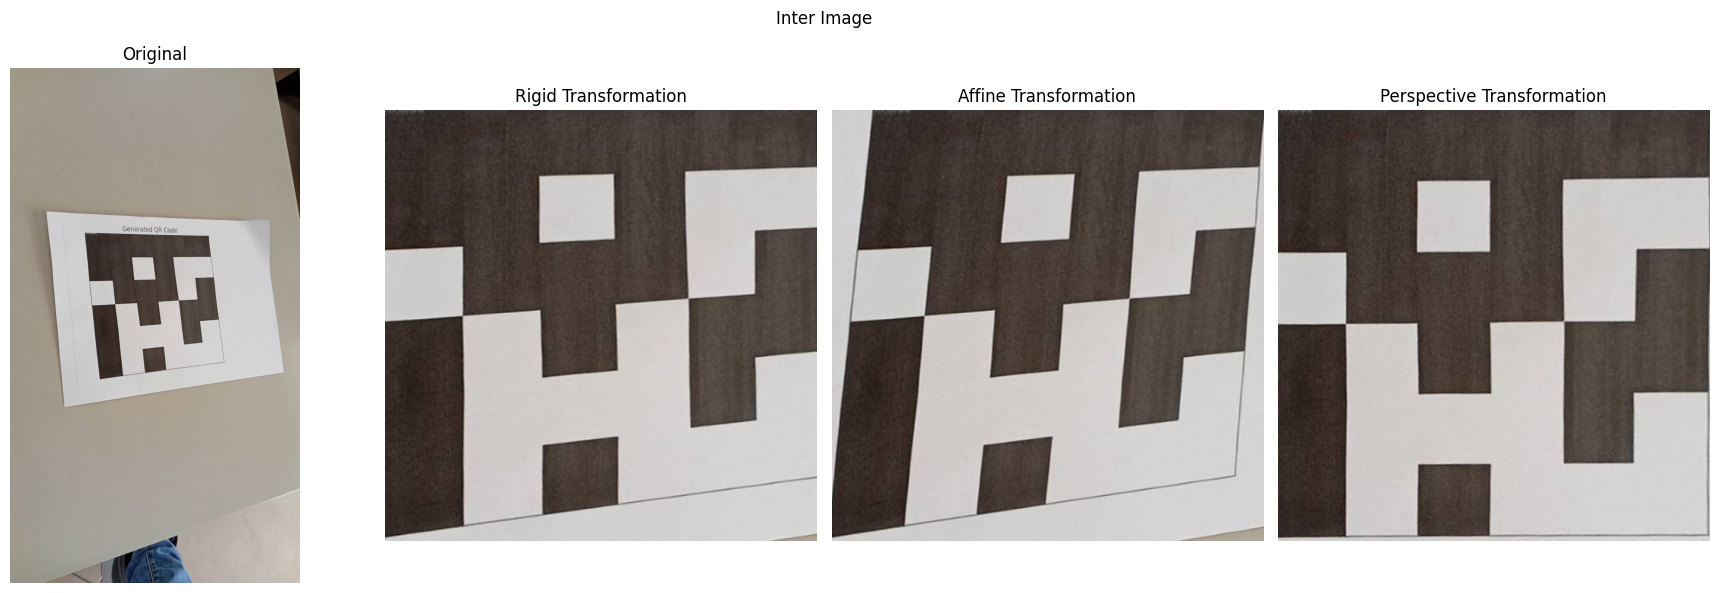

Processing Hard Image...


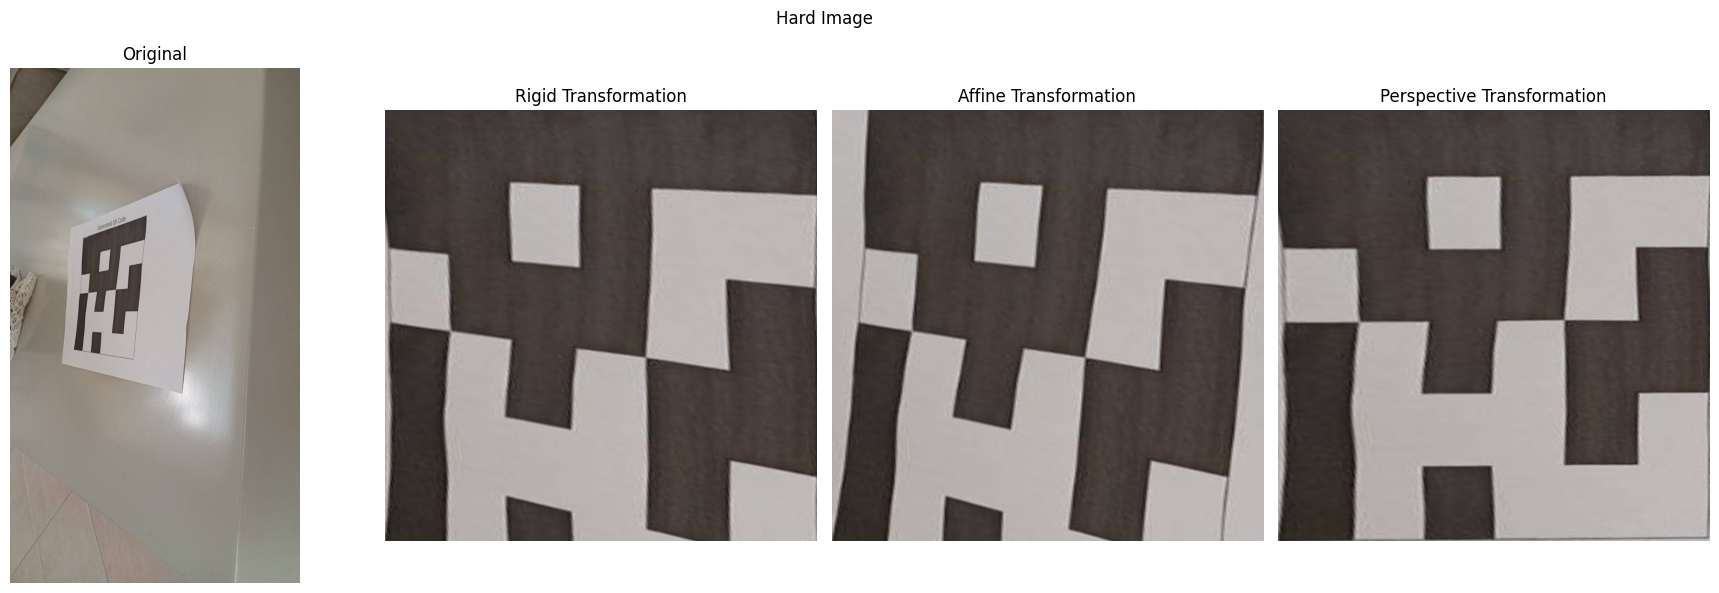

In [ ]:
# Paths to images and points
easy_image_path = 'Easy_image.jpg'
inter_image_path = 'Inter_image.jpg'
hard_image_path = 'Hard_image.jpg'

easy_points_path = 'QRs/Easy_points.npy'
inter_points_path = 'QRs/Inter_points.npy'
hard_points_path = 'QRs/Hard_points.npy'

# Load images and corresponding points
def load_data(image_path, points_path):
    image = cv2.imread(image_path)
    points = np.load(points_path).astype(np.float32)
    return image, points

easy_image, easy_points = load_data(easy_image_path, easy_points_path)
inter_image, inter_points = load_data(inter_image_path, inter_points_path)
hard_image, hard_points = load_data(hard_image_path, hard_points_path)

# Define destination points for transformations
definition_size = 500
dst_points = np.array([
    [0, 0],
    [definition_size, 0],
    [definition_size, definition_size],
    [0, definition_size]
], dtype=np.float32)

# Function to rotate image by 90 degrees
def rotate_image(image):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 90, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated

# Function to apply rigid transformation
def apply_rigid_transformation(image, src_points, dst_points):
    matrix = cv2.getAffineTransform(src_points[:3], dst_points[:3])
    transformed = cv2.warpAffine(image, matrix, (definition_size, definition_size))
    return rotate_image(transformed)

# Function to apply affine transformation
def apply_affine_transformation(image, src_points, dst_points):
    # Introduce shear in the destination points
    dst_points_affine = np.array([
        [0, 0],
        [definition_size, 50],  # Shear added
        [definition_size, definition_size]
    ], dtype=np.float32)
    matrix = cv2.getAffineTransform(src_points[:3], dst_points_affine)
    transformed = cv2.warpAffine(image, matrix, (definition_size, definition_size))
    return rotate_image(transformed)

# Function to apply perspective transformation
def apply_perspective_transformation(image, src_points, dst_points):
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    transformed = cv2.warpPerspective(image, matrix, (definition_size, definition_size))
    return rotate_image(transformed)

# Function to display the transformations
def display_transformations(image, src_points, dst_points, title):
    rigid_image = apply_rigid_transformation(image, src_points, dst_points)
    affine_image = apply_affine_transformation(image, src_points, dst_points)
    perspective_image = apply_perspective_transformation(image, src_points, dst_points)

    transformations = {
        "Rigid Transformation": rigid_image,
        "Affine Transformation": affine_image,
        "Perspective Transformation": perspective_image
    }

    plt.figure(figsize=(18, 6))
    plt.subplot(1, len(transformations) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    for i, (name, transformed_image) in enumerate(transformations.items(), start=2):
        plt.subplot(1, len(transformations) + 1, i)
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title(name)
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return perspective_image

# Apply transformations to each image and save perspective results
def process_image(image, src_points, dst_points, title):
    print(f"Processing {title}...")
    perspective_image = display_transformations(image, src_points, dst_points, title)
    return perspective_image

perspective_easy = process_image(easy_image, easy_points, dst_points, "Easy Image")
perspective_inter = process_image(inter_image, inter_points, dst_points, "Inter Image")
perspective_hard = process_image(hard_image, hard_points, dst_points, "Hard Image")


5. Explain the result of each transformation and why does it work/fail for
the given image.

We see that the prespective works best in all 3 pics
We also see that the easy works best in all the options
We also see that the affine is a bit more crooked then the rigid.
ofcurse for the easy image all work pretty well.
for the inter we see the crooked in the same dagree as the picture, which make sense.
in the hard we see that it even crops the pic it self, also the dagree is the same as we took the pic. we also see in the presepective that there is a bit of גל in this pic, which also makes sense as this looks like something the pic took

Depper explanations about the diffrent types:
Rigid Transformation: This maintains the exact shape and size of the pattern but may include rotations or translations (movements) of the entire image. As we can see, the pattern remains unchanged in its proportions.
Affine Transformation: This type of transformation can include scaling, rotation, translation, shearing, and reflection while maintaining parallel lines.As we can see, it changed the scale of the picture a bit
Perspective Transformation: This transformation simulates viewing the pattern from different angles, which can change how parallel lines appear and create perspective distortion. As we can see, in all 3 images it gives the best outcome, which is why we will use this in the next part

6. Extract the binary values from the straightened QR. The matrix is column
major, meaning that the correct order is (1,1), (2,1), ..., (6,1), (1,2), (2,2),
....., (6,6). Convert every 4 bits to an integer: e.g. 0110 –> 6, 1001–>9. Make sure you read the correct ID.

In [ ]:
def extract_qr_matrix(perspective_transformed, reference_id=None):
    # Convert the image to grayscale
    gray_qr = cv2.cvtColor(perspective_transformed, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary
    _, binary_qr = cv2.threshold(gray_qr, 128, 255, cv2.THRESH_BINARY)

    # Calculate cell size based on image dimensions
    cell_size = binary_qr.shape[0] // 6  # Assuming square QR code with 6x6 cells

    # Extract the 6x6 matrix
    binary_matrix = np.zeros((6, 6), dtype=int)
    for row in range(6):
        for col in range(6):
            cell = binary_qr[row * cell_size:(row + 1) * cell_size, col * cell_size:(col + 1) * cell_size]
            if np.mean(cell) > 128:
              binary_matrix[row, col] = 1
            else:
              binary_matrix[row, col] = 0

    # Prepare results
    results = {"extracted_matrix": binary_matrix}

    if reference_id:
        # Generate the reference matrix from the ID
        reference_matrix = ID2QR(reference_id)
        results["reference_matrix"] = reference_matrix
        results["is_match"] = np.array_equal(binary_matrix, reference_matrix)

    return results

id = "207487653"
# Apply the extraction and collect results for each image
result_easy = extract_qr_matrix(perspective_easy, reference_id=id)
result_intermediate = extract_qr_matrix(perspective_inter, reference_id=id)
result_hard = extract_qr_matrix(perspective_hard, reference_id=id)

# Print results
print("Easy Image Results:", result_easy)
print("Intermediate Image Results:", result_intermediate)
print("Hard Image Results:", result_hard)



Easy Image Results: {'extracted_matrix': array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1]]), 'reference_matrix': array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1]]), 'is_match': True}
Intermediate Image Results: {'extracted_matrix': array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1]]), 'reference_matrix': array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1]]), 'is_match': True}
Hard Image Results: {'extracted_matrix': array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
  

As we can see all 3 pics got the same qr. We used prespective tranfrom as it worked the best.

We split the image into 6x6 and then decided if it is black/wite  and then created the matrix based on that (if the avrage pixels was more then 128 )

## 3. Automatic Corner Detector - OPTIONAL

Notes:
1. In this task you may use any built-in function, If you use any, briefly
explain their algorithm and why you use them.
2. if you’re having a trouble finding the corners, you may add assumptions
to ease the task.

In this assignment you will use previously learned subjects to design an
automatic corner detection algorithm for the QR code reader. This detector
will be used to replace the manual input of the previous assignment.


1. Think of an algorithm to detect the QR code corners. You may search
online to find an algorithm or ideas.


2. Implement the algorithm. You should be able to find the corners of an
easy image. Finding the corners of more difficult images is encouraged.



3. Thoroughly explain the different algorithm steps and why they are done.
If any assumptions are made - describe them (e.g. assuming that the QR
code is printed on a paper with white margins).
If a step can be visualized using an image, show it!


4. Use the corners you found as an input to the first assignment. Show and
analyze the results on the images you took

## 4. Bonus


Take two images and use feature extraction methods that you have learned in
class and in this assignment to create a new trashed image. Be creative! One
of the images will be chosen by the course staff and it’s authors will
receive 0.5 bonus point to the final grade. The staff will judge by the
visual result, originality and the code.